# Lab2

## Задание 1

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Параметр распределения для эксперимента
theta_exper = 5.0

# Объёмы выборок
n_values = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
t = 1000

# Порог для доли превышений
eps = 0.01

# Инициализация генератора
rng = np.random.default_rng(42)

Дана параметризуемая функция плотности распределения вида
$$ f_{\theta} (x) = \frac{3x^2}{\sqrt{2 \pi}} exp \left( -\frac{(\theta - x^3)^2}{2} \right) $$

Введём функцию правдоподобия

$$ L_{\theta} (\vec{x}) = L_{\theta} (x_1, \dots, x_n) = \Pi^n_{i=1} f_{\theta} (x_i)$$

Чтобы найти параметр, который наиболее вероятно приводит к наблюдаемым данным по функции плотности, найдём такое $\hat{\theta}$, что $ L_{\theta} (\vec{x})$ достигает наибольшего значения, то есть её локальный максимум.

Для нашей $f_{\theta}$
$$ L_{\theta} (\vec{x}) = exp \left( -1/2 \sum^n_{i = 1} (\theta - x^3_i)^2\right) \cdot \frac{3^n}{\sqrt{2 \pi}^n} \cdot \Pi^n_{i = 1} x^2_i$$

Логарифмируя

$$ \ln ( L_{\theta} (\vec{x})) = l_{\theta} (\vec{x}) = -1/2 \sum^n_{i = 1} (\theta - x^3_i)^2 + A + \Pi^n_{i = 1} \ln(x^2_i) $$

Логарифм, как монотонная функция, сохранит искомый аргмакс, так что найдём аргмакс по $\theta$ для $l_{\theta}$

$$ \frac{d l_{\theta}}{d \theta} = \sum^n_{i = 1} x^3_i - n \theta$$

Приравнивая к нулю получим значение $\hat{\theta}$

$$ \hat{\theta} = 1/n \sum^n_{i = 1} x^3_i $$

In [ ]:
def f_theta(x, theta):
    return (3 * x**2 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (theta - x**3)**2)

# --- генерация выборки 
def sample_f_theta(theta, n, rng):
    y = rng.normal(loc=theta, scale=1, size=n)
    return np.cbrt(y)

# --- оценка макс.правд.
def hat_theta(x):
    return np.mean(x**3)

Исследуем на смещение 
$E [ \hat{\theta}] $

Исследуемая плотность в точности замена переменной в плотности нормального распределения $ Y_i = X_i^3$. То есть сумма в $E [ \hat{\theta}]$ идёт по матожиданиям нормальных случайных велечин. Из формулы плотности с матожиданием $\theta$

$$ E [ \hat{\theta}] = 1/n E[ \sum^n_{i = 1} Y_i ] = 1/n \sum^n_{i=1} E [Y_i] = 1/n \sum^n_{i=1} \theta = \theta$$

По определению, оценка получена несмещённая.

Аналогично касаемо дисперсии

$$ Var (\hat{\theta}) = 1/n^2 Var (\sum^n_{i = 1} Y_i) = \frac{1}{n^2} n = 1/n$$

Найдём эффективность оценки, посчитав MSE. Так как оценка несмещённая, то она совпадёт с дисперсией. Убедимся через $bias (\hat{\theta}) = E [\hat{\theta}] - \theta = 0$

$$ E [(\hat{\theta} - \theta)^2 ] = Var(\hat{\theta}) + (bias (\hat{\theta}) )^2 = Var(\hat{\theta})$$

Так и есть.

Теперь про свойства:

1. Оценка несмещённая

2. Оценка состоятельно. 
В силу неравенства Чебышёва, так как $Var (\hat{\theta}) = 1/n$, для всякой заранее заданной ширины доверительного интервала, с ростом $n$ $P(|\hat{\theta} - \theta | < \varepsilon) \rightarrow 1$

3. Оценка эффективна. Поймём, что её дисперсия наименьшая, пользуясь информацией Фишера и неравенством Рао-Крамера: 
$$ I (\theta) = E [(\frac{d l}{d \theta})^2] = E [ (Y - \theta)^2] = Var (Y) = 1$$


Информация Фишера для $n$ независимых испытаний

$$ I_n (\theta) = n I (\theta) = n$$

По нр-ву Рао-Крамера

$$ 1/n = Var (\hat{\theta}) \geq \frac{1}{I_n (\theta)} = 1/n$$

4. Оценка асимптотически нормальна.

$$ \sqrt{n} (\hat{\theta} - \theta) = \frac{1}{\sqrt{n}} \sum^n_{i = 1} (Y_i - \theta)$$

Дисперсия и матожидание у $Y$ конечны, поэтому по ЦПТ

$$\sqrt{n} (\hat{\theta} - \theta) = \frac{1}{\sqrt{n}} \sum^n_{i = 1} (Y_i - \theta) \longrightarrow_{n \rightarrow + \infty} \cal{N} (0, 1)$$

*Эксперимент*

In [24]:
results = {}

for n in n_values:
    estimates = np.empty(t)
    
    for i in range(t):
        x = sample_f_theta(theta_exper, n, rng)
        estimates[i] = hat_theta(x)
    
    mean_est = np.mean(estimates)
    bias = mean_est - theta_exper
    var = np.var(estimates, ddof=1)
    mse = bias**2 + var
    dolya = np.mean(np.abs(estimates - theta_exper) > eps)
    
    results[n] = dict(mean=mean_est, bias=bias, var=var, mse=mse, dolya=dolya)

header = f"{'n':>6} | {'mean':>10} | {'bias':>10} | {'var':>12} | {'mse':>12} | {'dolya':>8}"
print(header)
print('-' * len(header))
for n, r in results.items():
    print(f"{n:6d} | {r['mean']:10.4f} | {r['bias']:10.4f} | {r['var']:12.5f} | {r['mse']:12.5f} | {r['dolya']:8.3f}")

     n |       mean |       bias |          var |          mse |    dolya
-------------------------------------------------------------------------
    10 |     4.9898 |    -0.0102 |      0.09985 |      0.09996 |    0.981
    50 |     5.0006 |     0.0006 |      0.02043 |      0.02043 |    0.945
   100 |     4.9962 |    -0.0038 |      0.00974 |      0.00975 |    0.929
   500 |     4.9991 |    -0.0009 |      0.00196 |      0.00197 |    0.822
  1000 |     5.0020 |     0.0020 |      0.00094 |      0.00094 |    0.742
  5000 |     5.0005 |     0.0005 |      0.00020 |      0.00020 |    0.485
 10000 |     4.9994 |    -0.0006 |      0.00009 |      0.00009 |    0.290
 50000 |     5.0003 |     0.0003 |      0.00002 |      0.00002 |    0.018
100000 |     5.0000 |    -0.0000 |      0.00001 |      0.00001 |    0.002


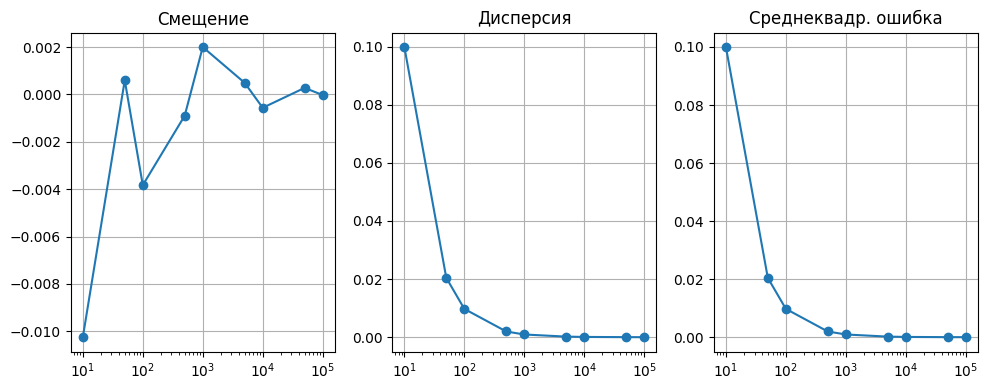

In [25]:
ns = np.array(list(results.keys()))
biases = np.array([results[n]['bias'] for n in ns])
variances = np.array([results[n]['var'] for n in ns])
mses = np.array([results[n]['mse'] for n in ns])

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.plot(ns, biases, 'o-', label='Смещение')
plt.xscale('log')
plt.title("Смещение")
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(ns, variances, 'o-', label='Дисперсия')
plt.xscale('log')
plt.title("Дисперсия")
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(ns, mses, 'o-', label='MSE')
plt.xscale('log')
plt.title("Среднеквадр. ошибка")
plt.grid(True)

plt.tight_layout()
plt.show()

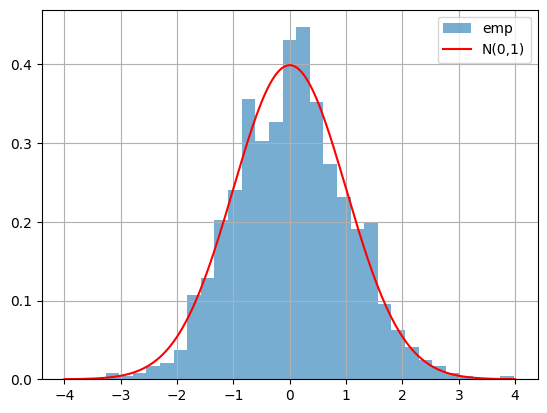

In [26]:
n = 10000
estimates = np.array([hat_theta(sample_f_theta(theta_exper, n, rng)) for _ in range(t)])
z_scores = np.sqrt(n) * (estimates - theta_exper)

plt.hist(z_scores, bins=30, density=True, alpha=0.6, label="emp")
x = np.linspace(-4, 4, 200)
plt.plot(x, norm.pdf(x), 'r', label="N(0,1)")
plt.legend()
plt.title("")
plt.grid(True)
plt.show()

## Задание 2

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, beta

theta_exper = 0.3
rng = np.random.default_rng(42)

# Априорные параметры
a0, b0 = 1, 1
# Порог для доли превышений
eps = 0.05

n_values = [5, 10, 50, 100, 500, 1000]
t = 1000


В байсовской постановке оценки параметров мы будем искать параметр как случайную величину из заданного априорного распределения 
$$ \theta \sim Be (a, b)$$

Функцией потерь задана MSE
$$ l (\hat{\theta}, \theta) = (\hat{\theta} - \theta)^2 $$

Исследование параметра происходит для геометрического распределения 

$$ p (X_k \;|\; \theta) = \theta (1 - \theta)^{k-1}$$

Так как функция потерь квадратична, то оцнеку байеса можно найти, как 
$$ \hat{\theta} = E [\theta \;|\; X]$$

Пользуясь теоремой Байеса для поиска апостериорного распределения:
$$
\pi(\theta \;|\; X) \sim L(X \;|\; \theta) \cdot \pi(\theta)
$$
где:
- $L(X \;|\; \theta)$ — правдоподобие данных;
- $\pi(\theta)$ — априорное распределение.

---

Найдём правдоподобие:

$$
L(X\mid\theta)=\prod_{i=1}^n \theta(1-\theta)^{x_i-1}
=\theta^n(1-\theta)^{\sum_{i=1}^n(x_i-1)}
$$

Обозначим $S=\sum_{i=1}^n x_i$. Тогда $\sum_{i=1}^n(x_i-1)=S-n$ и

$$
L(X\mid\theta)\sim \theta^n(1-\theta)^{S-n}
$$

Априор $\mathrm{Be}(a,b)$ имеет плотность
$$
\pi(\theta)=\frac{1}{B(a,b)}\theta^{a-1}(1-\theta)^{b-1}
$$

По формуле Байеса апостериор
$$
\pi(\theta\mid X)\sim L(X\mid\theta) \pi(\theta)
\sim \theta^{a+n-1}(1-\theta)^{b+S-n-1}
$$

Следовательно апостериор распределение — бета с параметрами $\alpha=a+n$, $\beta=b+S-n$:
$$
\boxed{\ \theta\mid X\sim\mathrm{Be}(a+n, b+S-n)\ }
$$

Пользуясь формулой среднего для $Be (x, y), \mu = \frac{x}{x + y}$, апостериорное среднее :
$$
\mathbb{E}[\theta\mid X]=\frac{a+n}{a+b+S}
$$

В частном случае $a=b=1$ получаем
$$
\boxed{\ \hat\theta_B=\mathbb{E}[\theta\mid X]=\frac{n+1}{S+2}=\frac{n+1}{\sum_{i=1}^n x_i + 2}\ }
$$`

In [28]:
def sample_geom(theta, n, rng):
    """Генерация выборки из Geom(theta)"""
    return rng.geometric(p=theta, size=n)

def bayes_estimate_geom(x, a=a0, b=b0):
    """Байесовская оценка E[θ|x]"""
    n = len(x)
    return (a + n) / (a + b + np.sum(x))

*Эксперимент*

In [29]:
results = {}

for n in n_values:
    estimates = np.empty(t)
    
    for i in range(t):
        x = sample_geom(theta_exper, n, rng)
        estimates[i] = bayes_estimate_geom(x)
    
    mean_est = np.mean(estimates)
    bias = mean_est - theta_exper
    var = np.var(estimates, ddof=1)
    mse = np.mean((estimates - theta_exper)**2)
    dolya = np.mean(np.abs(estimates - theta_exper) > eps)
    
    results[n] = dict(mean=mean_est, bias=bias, var=var, mse=mse, dolya=dolya)

In [30]:
header = f"{'n':>6} | {'mean':>10} | {'bias':>10} | {'var':>12} | {'mse':>12} | {'dolya':>8}"
print(header)
print('-' * len(header))
for n, r in results.items():
    print(f"{n:6d} | {r['mean']:10.4f} | {r['bias']:10.4f} | {r['var']:12.6f} | {r['mse']:12.6f} | {r['dolya']:8.3f}")

     n |       mean |       bias |          var |          mse |    dolya
-------------------------------------------------------------------------
     5 |     0.3628 |     0.0628 |     0.015071 |     0.019001 |    0.669
    10 |     0.3304 |     0.0304 |     0.007100 |     0.008020 |    0.512
    50 |     0.3056 |     0.0056 |     0.001257 |     0.001286 |    0.152
   100 |     0.3032 |     0.0032 |     0.000630 |     0.000640 |    0.052
   500 |     0.3011 |     0.0011 |     0.000127 |     0.000128 |    0.000
  1000 |     0.3006 |     0.0006 |     0.000063 |     0.000063 |    0.000


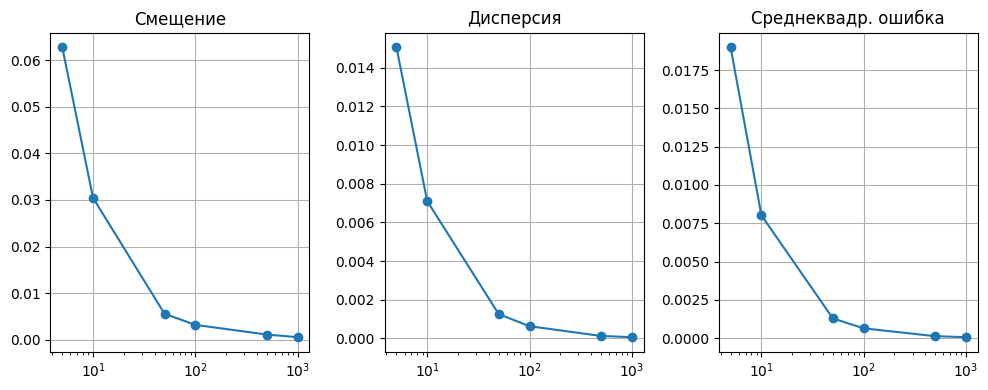

In [31]:
ns = np.array(list(results.keys()))
biases = np.array([results[n]['bias'] for n in ns])
variances = np.array([results[n]['var'] for n in ns])
mses = np.array([results[n]['mse'] for n in ns])

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.plot(ns, biases, 'o-', label='смещение')
plt.xscale('log')
plt.title("Смещение")
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(ns, variances, 'o-', label='дисперсия')
plt.xscale('log')
plt.title("Дисперсия")
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(ns, mses, 'o-', label='СКО')
plt.xscale('log')
plt.title("Среднеквадр. ошибка")
plt.grid(True)

plt.tight_layout()
plt.show()

*Сравнение с МПП*

In [ ]:
def mle_estimate_geom(x):
    """Оценка ММП для Geom(θ): \hat θ_MLE = n / \sum x_i"""
    n = len(x)
    s = np.sum(x)
    return n / s

results_bayes2 = {}
results_mle2 = {}

for n in n_values:
    est_b = np.empty(t)
    est_m = np.empty(t)
    for i in range(t):
        x = sample_geom(theta_exper, n, rng)
        est_b[i] = bayes_estimate_geom(x)
        est_m[i] = mle_estimate_geom(x)

    # Байес
    mean_b = np.mean(est_b)
    bias_b = mean_b - theta_exper
    var_b = np.var(est_b, ddof=1)
    mse_b = np.mean((est_b - theta_exper)**2)
    dolya_b = np.mean(np.abs(est_b - theta_exper) > eps)
    results_bayes2[n] = dict(mean=mean_b, bias=bias_b, var=var_b, mse=mse_b, dolya=dolya_b)

    # ММП
    mean_m = np.mean(est_m)
    bias_m = mean_m - theta_exper
    var_m = np.var(est_m, ddof=1)
    mse_m = np.mean((est_m - theta_exper)**2)
    dolya_m = np.mean(np.abs(est_m - theta_exper) > eps)
    results_mle2[n] = dict(mean=mean_m, bias=bias_m, var=var_m, mse=mse_m, dolya=dolya_m)


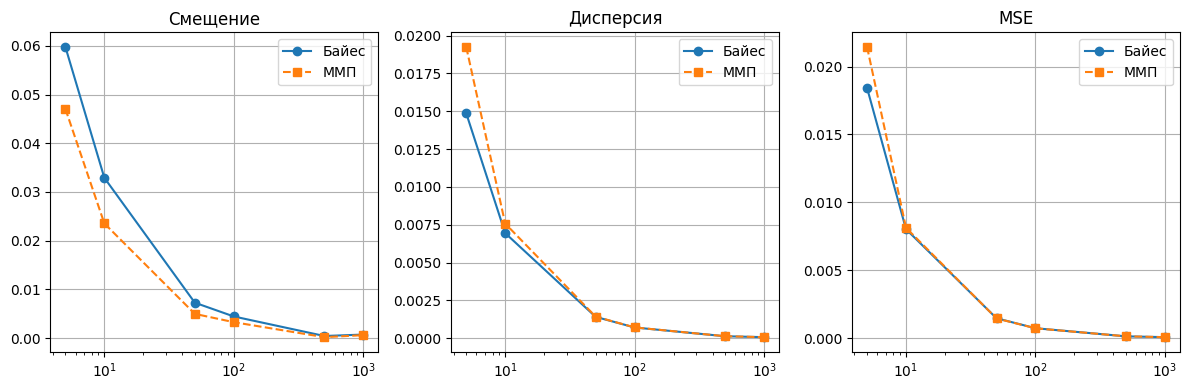

In [35]:
# Визуализация сравнения Байес vs ММП
ns2 = np.array(list(results_bayes2.keys()))

bayes_bias = np.array([results_bayes2[n]['bias'] for n in ns2])
mle_bias   = np.array([results_mle2[n]['bias'] for n in ns2])

bayes_var = np.array([results_bayes2[n]['var'] for n in ns2])
mle_var   = np.array([results_mle2[n]['var'] for n in ns2])

bayes_mse = np.array([results_bayes2[n]['mse'] for n in ns2])
mle_mse   = np.array([results_mle2[n]['mse'] for n in ns2])

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(ns2, bayes_bias, 'o-', label='Байес')
plt.plot(ns2, mle_bias, 's--', label='ММП')
plt.xscale('log')
plt.title('Смещение')
plt.grid(True)
plt.legend()

plt.subplot(1,3,2)
plt.plot(ns2, bayes_var, 'o-', label='Байес')
plt.plot(ns2, mle_var, 's--', label='ММП')
plt.xscale('log')
plt.title('Дисперсия')
plt.grid(True)
plt.legend()

plt.subplot(1,3,3)
plt.plot(ns2, bayes_mse, 'o-', label='Байес')
plt.plot(ns2, mle_mse, 's--', label='ММП')
plt.xscale('log')
plt.title('MSE')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


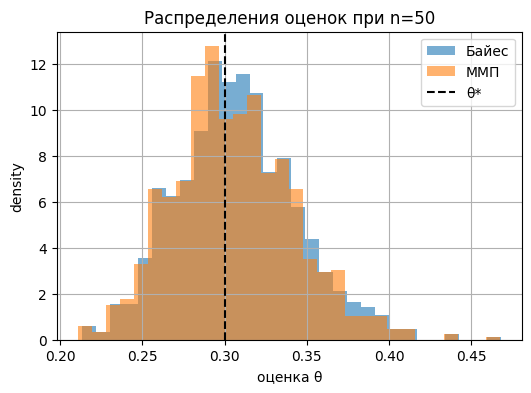

In [ ]:
# распределения оценок при фиксированном n
n_demo = 50
est_b = np.empty(t)
est_m = np.empty(t)
for i in range(t):
    x = sample_geom(theta_exper, n_demo, rng)
    est_b[i] = bayes_estimate_geom(x)
    est_m[i] = mle_estimate_geom(x)

plt.figure(figsize=(6,4))
plt.hist(est_b, bins=30, alpha=0.6, density=True, label='Байес')
plt.hist(est_m, bins=30, alpha=0.6, density=True, label='ММП')
plt.axvline(theta_exper, color='k', linestyle='--', label='θ*')
plt.title(f'Распределения оценок при n={n_demo}')
plt.xlabel('оценка θ')
plt.ylabel('density')
plt.legend()
plt.grid(True)
plt.show()
